## Mounting drive

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## Importing libraries

In [41]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import cv2
import glob

In [42]:
from jupyterthemes import jtplot
jtplot.style(theme='monokai', context='notebook', ticks=True, grid=False)

## Unzipping folders

In [4]:
!unzip /content/drive/MyDrive/face-mask-dataset.zip

Archive:  /content/drive/MyDrive/face-mask-dataset.zip
  inflating: Dataset/test.zip        
  inflating: Dataset/train.zip       


In [5]:
!unzip /content/Dataset/train.zip

Archive:  /content/Dataset/train.zip
   creating: train/
   creating: train/with_mask/
  inflating: train/with_mask/-110603108-gettyimages-533567012.jpg  
  inflating: train/with_mask/-110695084-mask2.jpg  
  inflating: train/with_mask/0-with-mask.jpg  
  inflating: train/with_mask/0000305-62360-halyard-health-pfr-p3-respirator-face-mask-ffp.jpeg  
  inflating: train/with_mask/0000444-48296-halyard-health-surgical-mask-teddy-bear-print.jpeg  
  inflating: train/with_mask/007563.jpg  
  inflating: train/with_mask/0779db20580fc7b054ad6b1b7bd9fb35.jpeg  
  inflating: train/with_mask/1-respirator-mask.jpg  
  inflating: train/with_mask/10-with-mask.jpg  
  inflating: train/with_mask/100-with-mask.jpg  
  inflating: train/with_mask/101-with-mask.jpg  
  inflating: train/with_mask/103-with-mask.jpg  
  inflating: train/with_mask/104-with-mask.jpg  
  inflating: train/with_mask/105-with-mask.jpg  
  inflating: train/with_mask/106.jpg  
  inflating: train/with_mask/107-with-mask.jpg  
  inflat

In [6]:
!unzip /content/Dataset/test.zip

Archive:  /content/Dataset/test.zip
   creating: test/
   creating: test/with_mask/
  inflating: test/with_mask/1-with-mask.jpg  
  inflating: test/with_mask/106-with-mask.jpg  
  inflating: test/with_mask/11-with-mask.jpg  
  inflating: test/with_mask/110-with-mask.jpg  
  inflating: test/with_mask/111-with-mask.jpg  
  inflating: test/with_mask/114-with-mask.jpg  
  inflating: test/with_mask/121-with-mask.jpg  
  inflating: test/with_mask/127-with-mask.jpg  
  inflating: test/with_mask/141-with-mask.jpg  
  inflating: test/with_mask/146-with-mask.jpg  
  inflating: test/with_mask/157-with-mask.jpg  
  inflating: test/with_mask/160-with-mask.jpg  
  inflating: test/with_mask/165-with-mask.jpg  
  inflating: test/with_mask/167-with-mask.jpg  
  inflating: test/with_mask/174-with-mask.jpg  
  inflating: test/with_mask/181-with-mask.jpg  
  inflating: test/with_mask/184-with-mask.jpg  
  inflating: test/with_mask/186-with-mask.jpg  
  inflating: test/with_mask/193-with-mask.jpg  
  infla

## Defining required functions

In [43]:
def read_images(file_path):
  x=[cv2.imread(file) for file in glob.glob(file_path+'/*.jpg')]
  return x

In [44]:
def convert_img_to_pix(images):
  x=[]
  for i in range(len(images)):
    images[i]=cv2.resize(images[i],(64,64))
    a=[]
    for j in range(len(images[i])):
      for k in range(len(images[i][j])):
        for l in images[i][j][k]:
          a.append(l)
    x.append(a)
  return x

## Preprocessing

In [9]:
train_masked=read_images('/content/train/with_mask')

In [45]:
train_masked=read_images('face-mask-dataset/Dataset/train/train/with_mask')

In [46]:
train_masked=convert_img_to_pix(train_masked)

In [11]:
train_unmasked=read_images('/content/train/without_mask')

In [47]:
train_unmasked=read_images('face-mask-dataset/Dataset/train/train/without_mask')

In [48]:
train_unmasked=convert_img_to_pix(train_unmasked)

In [13]:
test_masked=read_images('/content/test/with_mask')

In [49]:
test_masked=read_images('face-mask-dataset/Dataset/test/test/with_mask')

In [50]:
test_masked=convert_img_to_pix(test_masked)

In [15]:
test_unmasked=read_images('/content/test/without_mask')

In [51]:
test_unmasked=read_images('face-mask-dataset/Dataset/test/test/without_mask')

In [52]:
test_unmasked=convert_img_to_pix(test_unmasked)

In [53]:
train=[]
for i in range(0,len(train_masked)):
  train.append(train_masked[i])
for i in range(0,len(train_unmasked)):
  train.append(train_unmasked[i])

In [54]:
train_y=[]
for i in range(0,len(train_masked)):
  train_y.append(1)
for i in range(0,len(train_unmasked)):
  train_y.append(0)

In [55]:
test=[]
for i in range(0,len(test_masked)):
  test.append(test_masked[i])
for i in range(0,len(test_unmasked)):
  test.append(test_unmasked[i])

In [56]:
test_y=[]
for i in range(0,len(test_masked)):
  test_y.append(1)
for i in range(0,len(test_unmasked)):
  test_y.append(0)

In [57]:
x_train=train
y_train=np.array(train_y)
x_test=test
y_test=np.array(test_y)

## Classifiers

In [59]:
from sklearn.svm import SVC
svc = SVC().fit(x_train, y_train)
y_predict=svc.predict(x_test)

In [60]:
from sklearn.metrics import accuracy_score
print(accuracy_score(y_test,y_predict))

0.9123711340206185


In [61]:
from sklearn.linear_model import LogisticRegression
logir = LogisticRegression(max_iter=1500).fit(x_train, y_train)
logir.score(x_test,y_test)

0.9072164948453608

In [62]:
from sklearn.naive_bayes import BernoulliNB
bernoullinb = BernoulliNB()
bernoullinb.fit(x_train,y_train)
y_predi=bernoullinb.predict(x_test)
from sklearn.metrics import accuracy_score
print(accuracy_score(y_test,y_predi))

0.4948453608247423


In [63]:
from sklearn.model_selection import cross_val_score
crossvalscores = cross_val_score(svc, x_train, y_train,cv=5, scoring="accuracy")
crossvalscores

array([0.92366412, 0.92337165, 0.95019157, 0.92720307, 0.89655172])

In [64]:
crossvalscores.mean()

0.9241964259600479

In [65]:
from sklearn.model_selection import cross_val_score
cv_scores = cross_val_score(bernoullinb, x_train, y_train,cv=5, scoring="accuracy")
cv_scores

array([0.52671756, 0.53639847, 0.52490421, 0.46360153, 0.52873563])

In [66]:
cv_scores.mean()

0.5160714807990406

In [67]:
from sklearn.model_selection import cross_val_score
crossvalscores2 = cross_val_score(logir, x_train, y_train,cv=5, scoring="accuracy")
crossvalscores2

array([0.95801527, 0.90421456, 0.96551724, 0.98084291, 0.91570881])

In [68]:
crossvalscores2.mean()

0.9448597584159574

## Testing with a real image

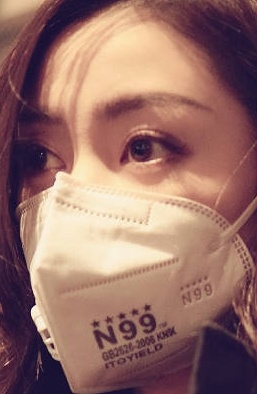

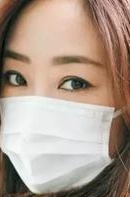

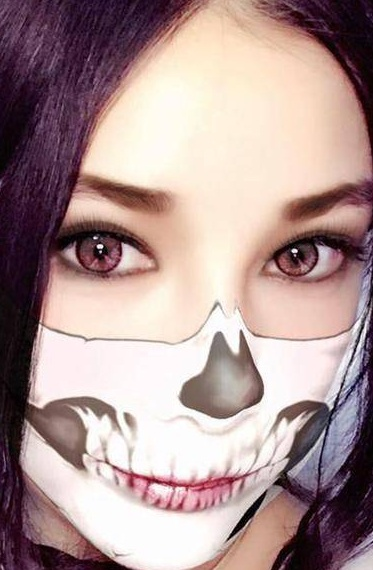

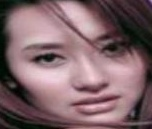

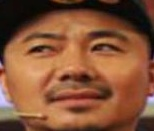

In [74]:
real_x_test=read_images('Minor_project_testing')
real_x_test=convert_img_to_pix(real_x_test)

In [75]:
svc.predict(real_x_test)

array([1, 1, 1, 0, 0])

In [76]:
logir.predict(real_x_test)

array([1, 1, 1, 1, 0])

In [77]:
bernoullinb.predict(real_x_test)

array([1, 1, 1, 1, 1])